In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import cv2
import tqdm as tqdm
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('D:\dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\dataset\Apple_black_rot\Black_rot (1).JPG
D:\dataset\Apple_black_rot\Black_rot (10).JPG
D:\dataset\Apple_black_rot\Black_rot (100).JPG
D:\dataset\Apple_black_rot\Black_rot (101).JPG
D:\dataset\Apple_black_rot\Black_rot (102).JPG
D:\dataset\Apple_black_rot\Black_rot (103).JPG
D:\dataset\Apple_black_rot\Black_rot (104).JPG
D:\dataset\Apple_black_rot\Black_rot (105).JPG
D:\dataset\Apple_black_rot\Black_rot (106).JPG
D:\dataset\Apple_black_rot\Black_rot (107).JPG
D:\dataset\Apple_black_rot\Black_rot (108).JPG
D:\dataset\Apple_black_rot\Black_rot (109).JPG
D:\dataset\Apple_black_rot\Black_rot (11).JPG
D:\dataset\Apple_black_rot\Black_rot (110).JPG
D:\dataset\Apple_black_rot\Black_rot (111).JPG
D:\dataset\Apple_black_rot\Black_rot (112).JPG
D:\dataset\Apple_black_rot\Black_rot (113).JPG
D:\dataset\Apple_black_rot\Black_rot (114).JPG
D:\dataset\Apple_black_rot\Black_rot (115).JPG
D:\dataset\Apple_black_rot\Black_rot (116).JPG
D:\dataset\Apple_black_rot\Black_rot (117).JPG
D:\dataset\Apple_

In [2]:
root_dir = "D:/dataset"
os.listdir(root_dir)

['Apple_black_rot', 'Apple_cedar_rust', 'Apple_scab']

In [3]:
Apple_black_rot = "D:\dataset/Apple_black_rot"
Apple_cedar_rust = "D:\dataset/Apple_cedar_rust"
Apple_scab = "D:\dataset/Apple_scab"


In [5]:
print("Number of Images in Each Directory:")
print(f"Apple_black_rot: {len(os.listdir(Apple_black_rot))}")
print(f"Apple_cedar_rust: {len(os.listdir(Apple_cedar_rust))}")
print(f"Apple_scab: {len(os.listdir(Apple_scab))}")

Number of Images in Each Directory:
Apple_black_rot: 170
Apple_cedar_rust: 160
Apple_scab: 150


In [6]:
x = []
y = [] 
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y

In [7]:
x,y= create_dataset(Apple_black_rot,"Apple_black_rot")
x,y= create_dataset(Apple_cedar_rust,"Apple_cedar_rust")
x,y= create_dataset(Apple_scab,"Apple_scab")

100%|██████████| 150/150 [00:02<00:00, 70.79it/s]


In [8]:
x =  np.array(x)
y = np.array(y)
x.shape,y.shape

((480, 150, 150, 3), (480,))

In [9]:
x.shape

(480, 150, 150, 3)

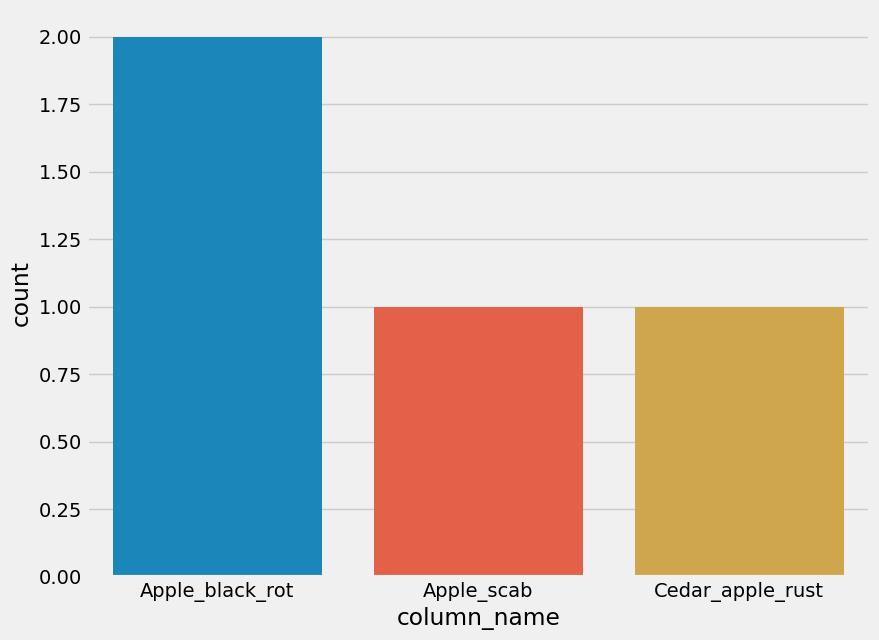

In [11]:
import seaborn as sns
df = pd.DataFrame({'column_name': ['Apple_black_rot', 'Apple_black_rot', 'Apple_scab', 'Cedar_apple_rust']})

plt.figure(figsize=(9,7))
plt.style.use("fivethirtyeight")
sns.countplot(data=df, x='column_name')  # Sử dụng 'data' và 'x' để chỉ định rõ ràng
plt.show()

In [12]:
classNames = {
    0:'black_rot',
    1:'cedar_rust',
    2:'scab'
}

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

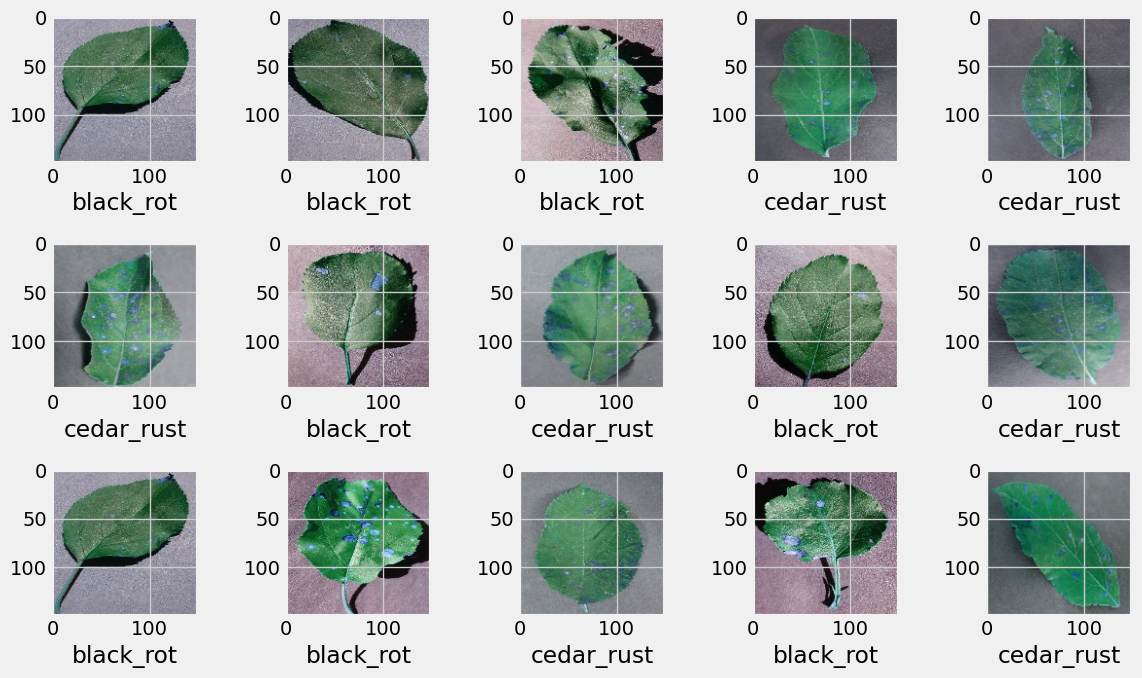

In [14]:
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample =  random.choice(range(len(x)))
    image = x[sample]
    category = classNames[y[sample]]
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image)
    plt.xlabel(category)
    
plt.tight_layout()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split # type: ignore
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
img_size =150

x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0


x_train = x_train.reshape(-1,img_size,img_size,3)
y_train = np.array(y_train)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [17]:
from  sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [18]:
x_train

array([[[[0.65490196, 0.67843137, 0.69803922],
         [0.65098039, 0.67058824, 0.69019608],
         [0.64705882, 0.67058824, 0.69019608],
         ...,
         [0.58431373, 0.58431373, 0.60392157],
         [0.59215686, 0.59215686, 0.61568627],
         [0.56470588, 0.56470588, 0.58823529]],

        [[0.63137255, 0.65490196, 0.6745098 ],
         [0.65098039, 0.6745098 , 0.69411765],
         [0.63921569, 0.6627451 , 0.68235294],
         ...,
         [0.56862745, 0.56862745, 0.59215686],
         [0.58431373, 0.58431373, 0.60784314],
         [0.58039216, 0.58039216, 0.60392157]],

        [[0.62745098, 0.65098039, 0.67058824],
         [0.65490196, 0.67843137, 0.69803922],
         [0.63137255, 0.65490196, 0.6745098 ],
         ...,
         [0.55294118, 0.55294118, 0.57647059],
         [0.57647059, 0.57647059, 0.6       ],
         [0.58823529, 0.58823529, 0.61176471]],

        ...,

        [[0.49019608, 0.49411765, 0.53333333],
         [0.50196078, 0.50588235, 0.54509804]

In [19]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)

In [20]:
y_train_lb

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]])

array([0, 0, 1])

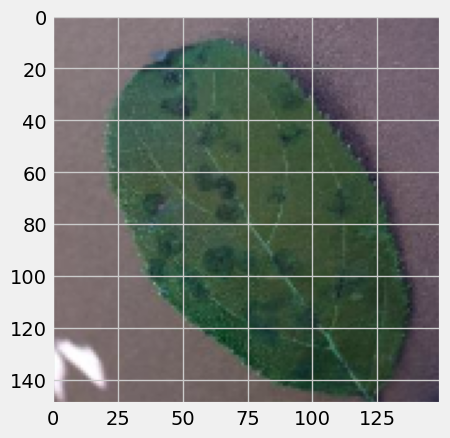

In [21]:
plt.imshow(x_train[22])
y_train_lb[22]

In [22]:
x_train.shape

(384, 150, 150, 3)

# Xây dựng mô hình CNN

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [24]:
model = Sequential()

In [25]:
width = 150
height = 150
classes = 5

In [26]:
shape = (width, height, 3)
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(classes))
model.add(Activation("softmax"))
model.summary()

e:\File hoc tap\Ngon Ngu Lap Trinh Hien Dai\anaconda\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,859,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,930,853 (171.40 MB)

 Trainable params: 44,929,445 (171.39 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [27]:
model.compile(loss="sparse_categorical_crossentropy",optimizer = 'adam', metrics=['accuracy'])

# Bắt đầu huấn luyện mô hình

In [28]:
print("Start training")
model.fit(x_train,y_train,epochs=30)

Start training
Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7471 - loss: 1.4003
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9728 - loss: 0.0722
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9956 - loss: 0.0203
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9607 - loss: 0.1408
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9961 - loss: 0.0257
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9960 - loss: 0.0074
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9884 - loss: 0.0346
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9886 - loss: 0.0493
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9994 - loss: 0.0034
Epoch 10/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9986 - loss: 0.0082
Epoch 11/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9986 - loss: 0.0076
Epoch 12/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accura

# Huấn luyên mô hình v1

In [ ]:

model.fit(x_train,y_train,epochs=30)

Epoch 1/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - accuracy: 0.4983 - loss: 8.8942
Epoch 2/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.7596 - loss: 0.7773
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.8596 - loss: 0.3824
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - accuracy: 0.9226 - loss: 0.2336
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9349 - loss: 0.1923
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.9353 - loss: 0.2407
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9578 - loss: 0.1335
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.9598 - loss: 0.1193
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.9773 - loss: 0.0767
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.9920 - loss: 0.0349
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9938 - loss: 0.0206
Epoch 12/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.99

# Xây dựng mô hình VGG19

In [30]:
from tensorflow.keras.applications.vgg19 import VGG19
base_model = VGG19(
    weights="imagenet",
    include_top=False, 
    input_shape=(150,150) + (3,)
)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 142s 2us/step


In [31]:
output = base_model.get_layer(index = -1).output  
output = Flatten()(output)
# let's add a fully-connected layer
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
# and a logistic layer -- let's say we have 4 classes
output = Dense(5, activation='softmax')(output)

In [32]:
vgg19_model = Model(base_model.input, output)
for layer in vgg19_model.layers[:-7]:
    layer.trainable = False

vgg19_model.summary()

vgg19_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics =['accuracy'])
history = vgg19_model.fit_generator(train_generator,
                              epochs=30,
                              verbose=1,
                              validation_data=val_generator,
                              callbacks = callbacks
                              )

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,04

 Total params: 24,488,517 (93.42 MB)

 Trainable params: 4,462,085 (17.02 MB)

 Non-trainable params: 20,026,432 (76.39 MB)

AttributeError: 'Functional' object has no attribute 'fit_generator'

# Đánh giá mô hình với dữ liệu train và test sau huấn luyện

In [33]:
_,acc = model.evaluate(x_train,y_train)
print("Train Accuracy : ",acc*100)

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - accuracy: 0.5433 - loss: 6.1872
Train Accuracy :  52.08333134651184


In [34]:
_,acc = model.evaluate(x_test,y_test)
print("Test Accuracy : ",acc*100)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 0.4701 - loss: 7.4465
Test Accuracy :  47.91666567325592


In [35]:
from matplotlib.pyplot import imshow

def Prediction(im):
    x = np.array(im.resize((150,150)))
    x = x.reshape(1,150,150,3)

    res = model.predict_on_batch(x)
    print(res)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(im)
    print(str(res[0][classification]*100) + '% Confidence ' + classNames[classification])

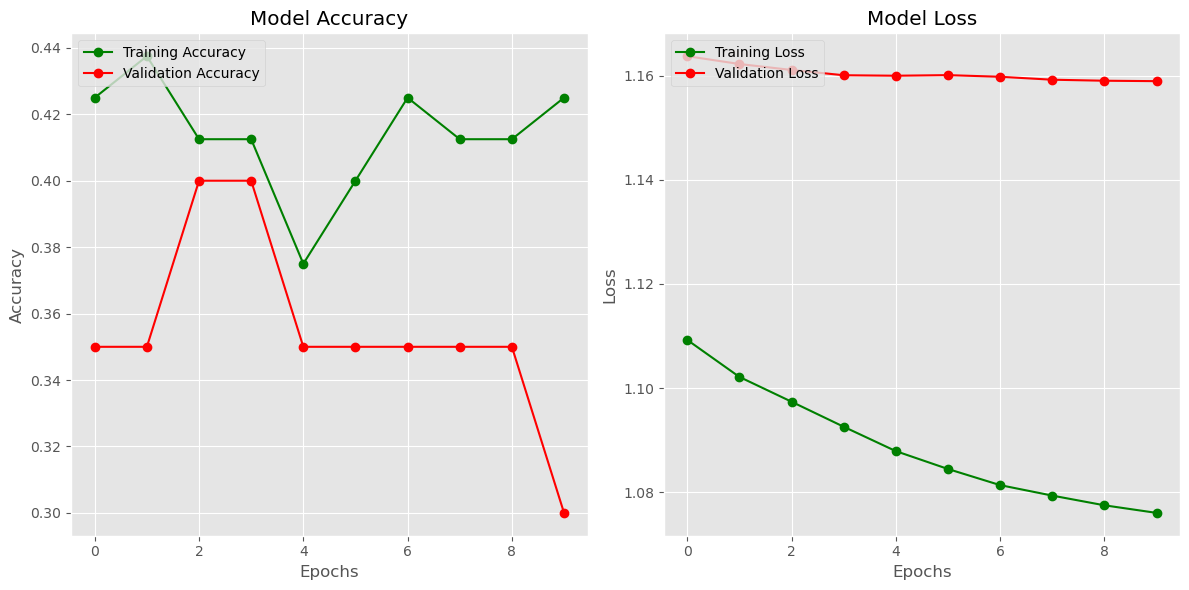

In [19]:
import matplotlib.pyplot as plt

# Plotting the learning curve
plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Accuracy plot
axes[0].plot(history.epoch, history.history['accuracy'], 'go-', label='Training Accuracy')
axes[0].plot(history.epoch, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='upper left')

# Loss plot
axes[1].plot(history.epoch, history.history['loss'], 'go-', label='Training Loss')
axes[1].plot(history.epoch, history.history['val_loss'], 'ro-', label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()

# Dự đoán thử mô hình với hình ảnh bất kì


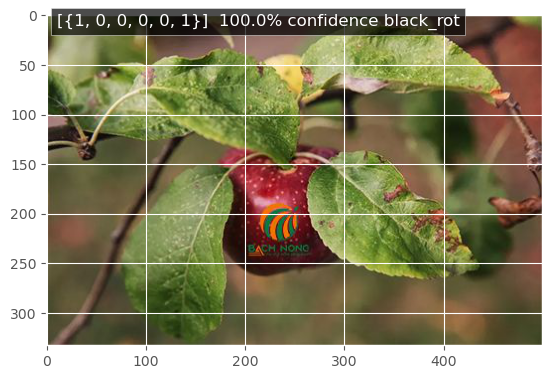

In [65]:
from PIL import Image
test_img = Image.open("D:/latao.jpg").convert('RGB')
Prediction(test_img)

In [3]:
model.save("model-v1.h5")

# Đánh giá mô hình


In [8]:
from tensorflow.keras.models import load_model
model_path = 'E:\File hoc tap\Học máy\Thuyết trình đợt 2/model-v1.h5'
model = load_model(model_path)


In [2]:
y_pred = model.predict(x_test)    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [3]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [4]:
y_pred_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [5]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        12
           1       0.00      0.00      0.00         8

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.37        20
weighted avg       0.36      0.60      0.45        20



e:\File hoc tap\Ngon Ngu Lap Trinh Hien Dai\anaconda\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\File hoc tap\Ngon Ngu Lap Trinh Hien Dai\anaconda\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\File hoc tap\Ngon Ngu Lap Trinh Hien Dai\anaconda\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

(<Figure size 800x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

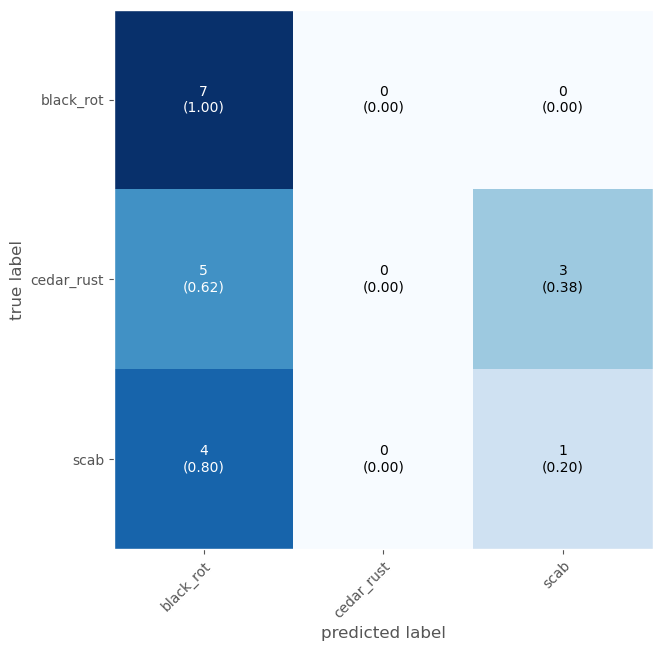

In [20]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred_classes)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["black_rot","cedar_rust","scab"], show_normed = True)